**DATA ANALYSIS Python PROJECT - BLINKIT ANALYSIS**|


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel(r"C:\Users\N K SHREEVATAV\Documents\DA Projects\BlinkIT Grocery Data.xlsx")


In [3]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [5]:
df.shape


(8523, 12)

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

**DATA CLEANING**


In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [11]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})


In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


**Business**

In [26]:
#total Sales
total_sales = df['Sales'].sum()

#avgsales
avg_sales = df['Sales'].mean()

#noofitemssold
no_of_items_sold = df['Sales'].count()

#AVGRATING

avg_ratings = df['Rating'].mean()

print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"No of Items: {no_of_items_sold:,.1f}")
print(f"Average Ratings: {avg_ratings:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
No of Items: 8,523.0
Average Ratings: 4.0


**CHARTS REQUIREMENTS**


In [29]:
#Total sales By Fatcontent

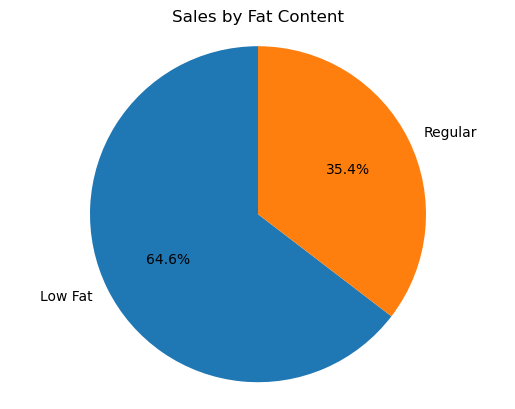

In [37]:
sales_by_Fat = df.groupby("Item Fat Content")['Sales'].sum()
plt.pie(sales_by_Fat, labels = sales_by_Fat.index,
                            autopct = '%.1f%%',
                            startangle =90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

####TOTAL SALES BY ITEM TYPE


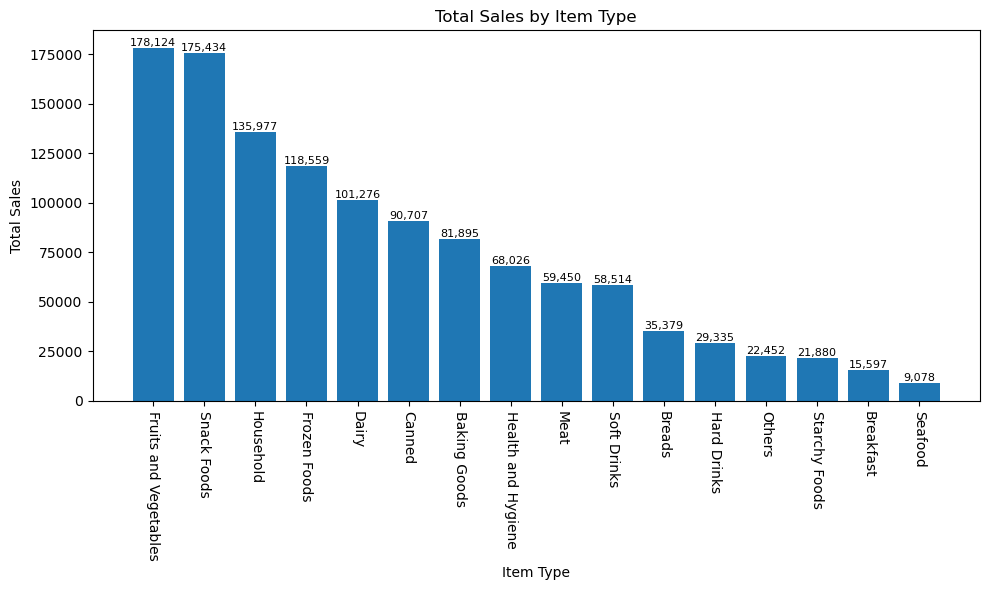

In [43]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:

    plt.text(bar.get_x()+bar.get_width() /2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha = 'center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**FAT CONTENT**

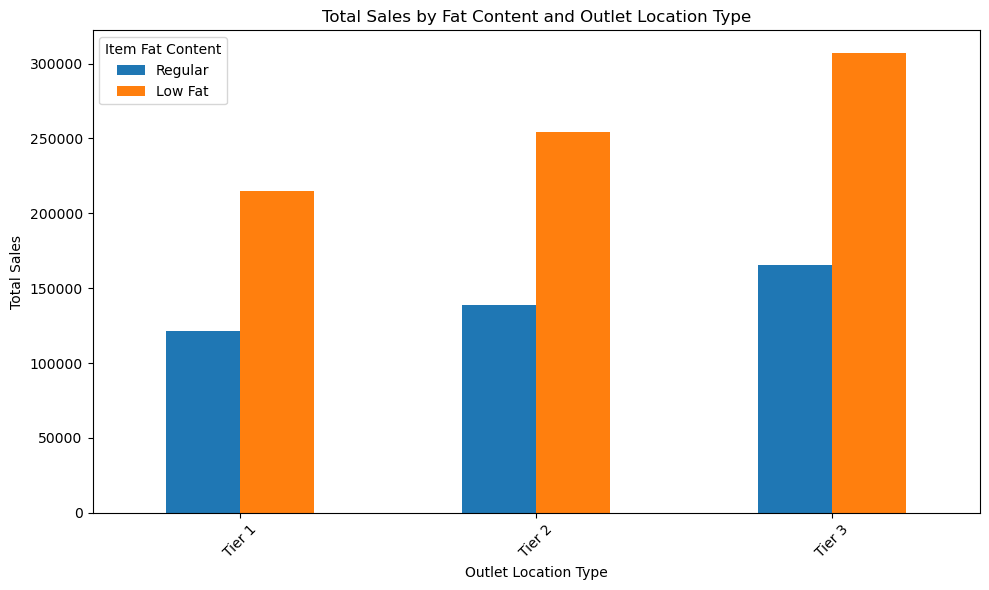

In [49]:

grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(10, 6))
ax.set_title('Total Sales by Fat Content and Outlet Location Type')
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Total Sales')
ax.legend(title='Item Fat Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
total_sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()





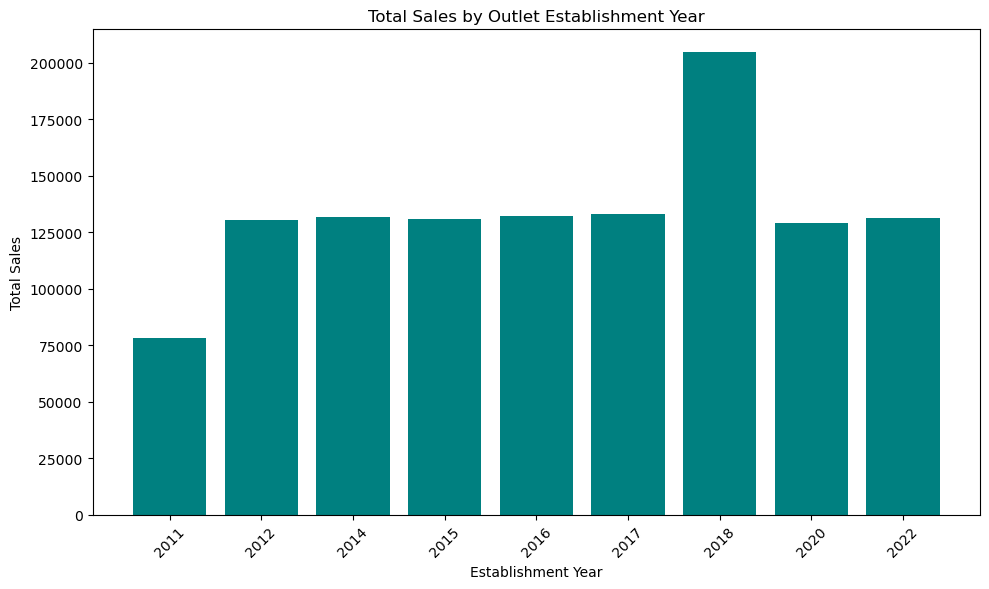

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(total_sales_by_year['Outlet Establishment Year'].astype(str), total_sales_by_year['Sales'], color='teal')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
total_sales_by_size = df.groupby('Outlet Size')['Sales'].sum().reset_index()


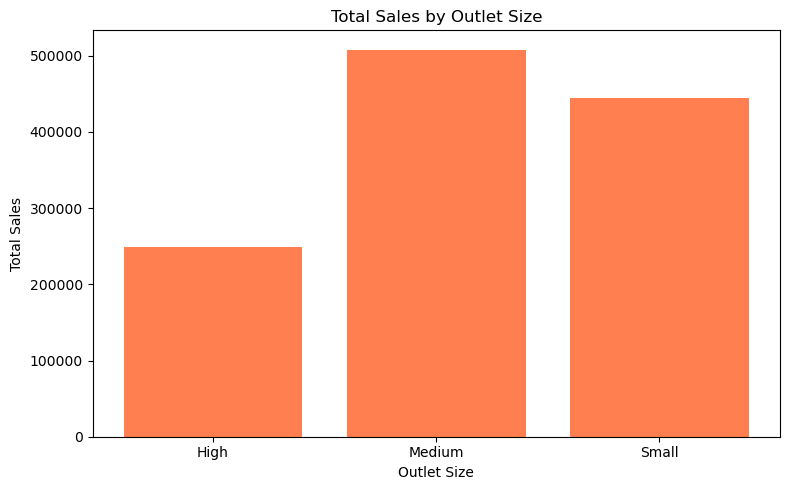

In [61]:
plt.figure(figsize=(8, 5))
plt.bar(total_sales_by_size['Outlet Size'], total_sales_by_size['Sales'], color='coral')
plt.title('Total Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()